<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.613972,98.567336,76.399605,-0.004054,254.576858,254.576081,0.000778
1,0.0,1.0,61.930400,23.078190,80.336147,-0.028800,175.315936,175.337748,-0.021812
2,0.0,2.0,30.487472,76.365030,58.877559,-0.010929,175.719132,175.731483,-0.012351
3,0.0,3.0,60.501696,87.670322,85.918676,0.002036,244.092729,244.085986,0.006744
4,0.0,4.0,84.106437,76.843317,95.199632,-0.009893,266.139493,266.140062,-0.000569
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.663230,42.484228,90.605227,0.008346,203.761029,203.745925,0.015104
19996,999.0,16.0,66.351463,31.956731,81.300978,-0.009693,189.599478,189.600146,-0.000667
19997,999.0,17.0,32.360118,89.337419,83.289609,0.002206,214.989352,214.990758,-0.001406
19998,999.0,18.0,88.865060,30.786715,85.211618,-0.023147,214.840246,214.851441,-0.011195


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.613972,98.567336,76.399605,-0.004054,254.576858,254.576081,0.000778
1,0.0,1.0,61.930400,23.078190,80.336147,-0.028800,175.315936,175.337748,-0.021812
2,0.0,2.0,30.487472,76.365030,58.877559,-0.010929,175.719132,175.731483,-0.012351
3,0.0,3.0,60.501696,87.670322,85.918676,0.002036,244.092729,244.085986,0.006744
4,0.0,4.0,84.106437,76.843317,95.199632,-0.009893,266.139493,266.140062,-0.000569
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.663230,42.484228,90.605227,0.008346,203.761029,203.745925,0.015104
19996,999.0,16.0,66.351463,31.956731,81.300978,-0.009693,189.599478,189.600146,-0.000667
19997,999.0,17.0,32.360118,89.337419,83.289609,0.002206,214.989352,214.990758,-0.001406
19998,999.0,18.0,88.865060,30.786715,85.211618,-0.023147,214.840246,214.851441,-0.011195


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.613972,98.567336,76.399605,-0.004054,254.576858,254.576081,0.000778
1,0.0,1.0,61.930400,23.078190,80.336147,-0.028800,175.315936,175.337748,-0.021812
2,0.0,2.0,30.487472,76.365030,58.877559,-0.010929,175.719132,175.731483,-0.012351
3,0.0,3.0,60.501696,87.670322,85.918676,0.002036,244.092729,244.085986,0.006744
4,0.0,4.0,84.106437,76.843317,95.199632,-0.009893,266.139493,266.140062,-0.000569
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.663230,42.484228,90.605227,0.008346,203.761029,203.745925,0.015104
19996,999.0,16.0,66.351463,31.956731,81.300978,-0.009693,189.599478,189.600146,-0.000667
19997,999.0,17.0,32.360118,89.337419,83.289609,0.002206,214.989352,214.990758,-0.001406
19998,999.0,18.0,88.865060,30.786715,85.211618,-0.023147,214.840246,214.851441,-0.011195


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

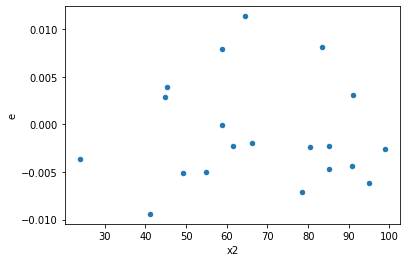

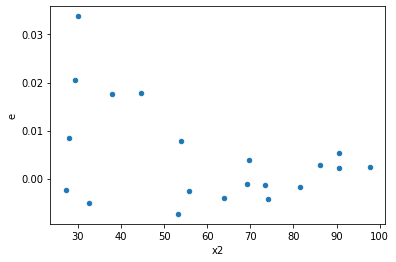

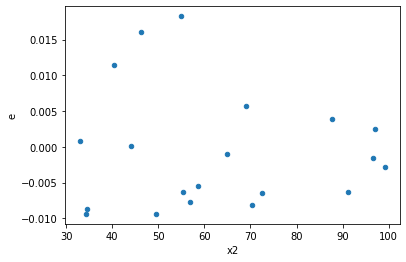

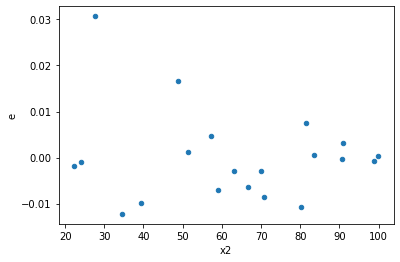

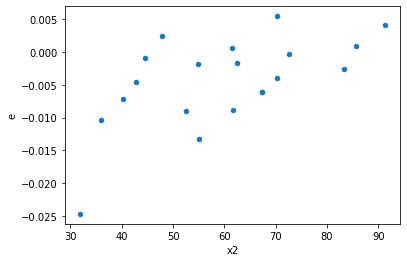

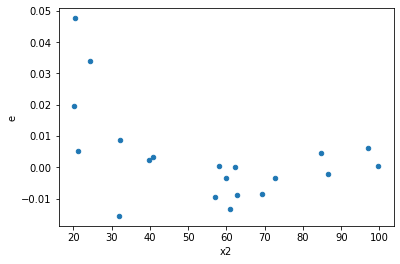

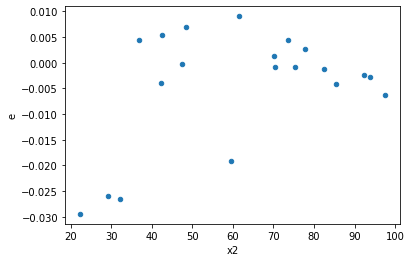

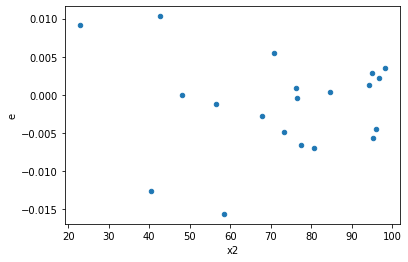

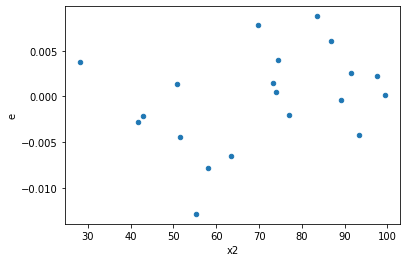

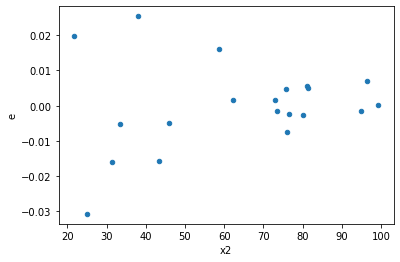

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
9.0,5.0,5.0,0.00016614442179604963,6.409873220861584e-05,4.1536105449012407e-05,1.602468305215396e-05,2.5920079238902223,0.3192542723814975,0.8403728638092512,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,8.670587278287611e-05,6.703826547867574e-05,2.167646819571903e-05,1.6759566369668934e-05,1.293378821241377,0.784601597041477,0.6076992014792615,Reject005=1 : Homoscedasticity
18.0,5.0,5.0,0.00010301064397826952,6.93582967097996e-05,2.575266099456738e-05,1.73395741774499e-05,1.4851956992149606,0.6748401679304483,0.6625799160347758,Reject005=1 : Homoscedasticity
21.0,5.0,5.0,0.00015091115766143506,5.125145912730485e-05,3.7727789415358765e-05,1.2812864781826212e-05,2.9445241214807734,0.2609782515691801,0.86951087421541,Reject005=1 : Homoscedasticity
30.0,5.0,5.0,0.0002900653533298505,0.0002862367123302174,7.251633833246263e-05,7.155917808255436e-05,1.0133757859656247,0.9887219571380546,0.5056390214309727,Reject005=1 : Homoscedasticity
47.0,5.0,5.0,0.00010447126496771939,7.10730931175429e-05,2.6117816241929848e-05,1.7768273279385723e-05,1.4699130203175703,0.6828269596198313,0.6585865201900843,Reject005=1 : Homoscedasticity
100.0,5.0,5.0,0.00033155874679489266,0.0003112204052022922,8.288968669872317e-05,7.780510130057305e-05,1.0653502831197095,0.9463110157887993,0.5268444921056004,Reject005=1 : Homoscedasticity
108.0,5.0,5.0,5.4592278231502706e-05,2.9139580993513133e-05,1.3648069557875676e-05,7.284895248378283e-06,1.873475059358461,0.507457916702108,0.746271041648946,Reject005=1 : Homoscedasticity
126.0,5.0,5.0,0.00013379272481123676,0.00011149176643206874,3.344818120280919e-05,2.7872941608017184e-05,1.2000233657859916,0.846288690073115,0.5768556549634425,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,9.985067851805607e-05,0.00417103152728335,2.4962669629514018e-05,0.0010427578818208375,0.02393908505963516,0.0008854130332930563,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.00014858849097271282,0.0018363651232348127,3.7147122743178206e-05,0.0004590912808087032,0.08091445927211345,0.015341358508305048,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,4.415848035841364e-05,0.0012634068134778555,1.103962008960341e-05,0.0003158517033694639,0.03495190930374671,0.0021953685914131776,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,2.3264623611065462e-05,0.0006398735478527118,5.8161559027663656e-06,0.00015996838696317794,0.036358158090980496,0.002411214713425174,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,8.467457280425694e-05,0.0007305606038893193,2.1168643201064236e-05,0.00018264015097232982,0.11590355728665219,0.03365735439101046,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,2.1327428281345082e-05,0.000288256515792845,5.3318570703362704e-06,7.206412894821125e-05,0.0739876710945608,0.012548628133933763,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,0.00011571815713345216,0.0002569905266506231,2.892953928336304e-05,6.424763166265577e-05,0.45028180081816876,0.4017292867042828,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,2.0034331382305272e-05,5.527375905289469e-05,5.008582845576318e-06,1.3818439763223672e-05,0.362456466243471,0.2896417287880272,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.00021174367811793214,0.001158633586071746,5.2935919529483034e-05,0.0002896583965179365,0.18275292608755805,0.08560362505029882,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    543
Reject005=1 : Homoscedasticity      457
Name: Result_test, dtype: int64